In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

Using TensorFlow backend.
C:\Users\meetk\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\meetk\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\meetk\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\meetk\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [99]:
# Get images
image = img_to_array(load_img('C:/Users/meetk/Desktop/new10.png'))
image = np.array(image, dtype=float)

In [100]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [101]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [102]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')

In [103]:
model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.7610
Epoch 2/100
1/1 [==============================] - 1s 571ms/step - loss: 0.7573
Epoch 3/100
1/1 [==============================] - 1s 520ms/step - loss: 0.1051
Epoch 4/100
1/1 [==============================] - 1s 705ms/step - loss: 0.2778
Epoch 5/100
1/1 [==============================] - 1s 735ms/step - loss: 0.0142
Epoch 6/100
1/1 [==============================] - 1s 630ms/step - loss: 0.0104
Epoch 7/100
1/1 [==============================] - 1s 532ms/step - loss: 0.0097
Epoch 8/100
1/1 [==============================] - 1s 530ms/step - loss: 0.0094
Epoch 9/100
1/1 [==============================] - 1s 570ms/step - loss: 0.0091
Epoch 10/100
1/1 [==============================] - 1s 756ms/step - loss: 0.0089
Epoch 11/100
1/1 [==============================] - 1s 530ms/step - loss: 0.0085
Epoch 12/100
1/1 [==============================] - 1s 593ms/step - loss: 0.0084
Epoch 13/100
1/1 [======================

In [104]:
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
imsave("img_result19.png", lab2rgb(cur))
imsave("img_gray_version.png", rgb2gray(lab2rgb(cur)))

1/1 [==============================] - 1s 665ms/step
0.002075007651001215


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [105]:
import cv2
c = cv2.imread("img_result19.png")

In [106]:
c

array([[[254, 254, 255],
        [254, 254, 255],
        [253, 254, 255],
        ...,
        [255, 254, 255],
        [255, 253, 255],
        [255, 253, 255]],

       [[254, 254, 255],
        [253, 253, 255],
        [253, 254, 255],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 254, 255]],

       [[253, 253, 255],
        [253, 253, 255],
        [254, 253, 255],
        ...,
        [251, 254, 255],
        [249, 253, 255],
        [253, 254, 255]],

       ...,

       [[255, 253, 255],
        [255, 251, 255],
        [255, 252, 255],
        ...,
        [255, 252, 255],
        [255, 252, 255],
        [255, 251, 255]],

       [[255, 255, 252],
        [255, 253, 255],
        [255, 253, 255],
        ...,
        [255, 253, 255],
        [255, 254, 255],
        [255, 252, 255]],

       [[255, 255, 251],
        [255, 252, 255],
        [255, 251, 255],
        ...,
        [255, 252, 255],
        [255, 252, 255],
        [255, 252, 255]]

In [107]:
f=(array_to_img(load_img("img_result19.png")))

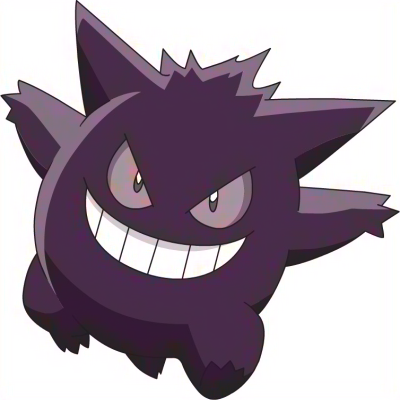

In [108]:
f